 Kütüphaneleri import ederek ML yolculuğumuza başlıyoruz.
1. Kütüphaneleri import ediyoruz

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor


2. Veri setini yüklüyoruz

In [5]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
veriler = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)


Veri setini kontrol ediyoruz.


Veri setinin boyutunu kontrol ediyoruz.

In [6]:
print("Veri setinin ilk birkaç satırı:")
print(veriler.head())


print("Veri setinin boyutu:", veriler.shape)

Veri setinin ilk birkaç satırı:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Veri setinin boyutu: (506, 14)


Verileri düzenli sayı sırasına koyuyoruz.

Eksik veri kontrolü yapıyoruz.

In [7]:
def numeric_features(dataset):
    numeric_col = dataset.select_dtypes(include=np.number).columns.tolist()
    return dataset[numeric_col].head()

numeric_columns = numeric_features(veriler)
print("Numerical Features:")
print(numeric_columns)

print("===="*20)


print("Eksik veri kontrolü:") #yok
print(veriler.isnull().sum())


Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Eksik veri kontrolü:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


3. Kategorik değişkenleri işliyoruz.

'CHAS' sütununu kategorik olarak işleyeceğiz

In [8]:
veriler['CHAS'] = veriler['CHAS'].astype('category')


One-Hot Encoding uyguluyoruz.

In [9]:
veriler_encoded = pd.get_dummies(veriler, columns=['CHAS']) #pd.get_dumies ohe uygulamamızı kolaylaştırıyor.



 Bağımsız ve bağımlı değişkenleri ayırıyoruz.


Eğitim ve test kümelerini oluşturuyoruz

In [10]:
X = veriler_encoded.drop('MEDV', axis=1) #bağımsız değişkenler
Y = veriler_encoded['MEDV']


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#test_size => veri setinin %20'sinin test kümesi olarak ayrılacağı belirtildi..
#random_state=>veri setini rastgele bölümlemek için kullanılan rastgele sayı üretecinin başlangıç durumunu belirler. Bu, her çalıştırmada aynı sonuçları almak için kullanılır.



Sonuçları kontrol ediyoruz

In [11]:
print("One-Hot Encoding uygulanmış veri setinin ilk birkaç satırı:")
print(X_train.head())


One-Hot Encoding uygulanmış veri setinin ilk birkaç satırı:
         CRIM    ZN  INDUS     NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
477  15.02340   0.0  18.10  0.6140  5.304  97.3  2.1007   24  666.0     20.2   
15    0.62739   0.0   8.14  0.5380  5.834  56.5  4.4986    4  307.0     21.0   
332   0.03466  35.0   6.06  0.4379  6.031  23.3  6.6407    1  304.0     16.9   
423   7.05042   0.0  18.10  0.6140  6.103  85.1  2.0218   24  666.0     20.2   
19    0.72580   0.0   8.14  0.5380  5.727  69.5  3.7965    4  307.0     21.0   

          B  LSTAT  CHAS_0  CHAS_1  
477  349.48  24.91    True   False  
15   395.62   8.47    True   False  
332  362.25   7.83    True   False  
423    2.52  23.29    True   False  
19   390.95  11.28    True   False  


Modelleri oluşturuyoruz

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Decision Tree": DecisionTreeRegressor()
}

Her bir model için işlemleri tekrarlayalım

Linear Regression Modeli için R2 Değerleri:
Eğitim Veri Kümesi R2 Değeri: 0.7508856358979673
Test Veri Kümesi R2 Değeri: 0.6687594935356338


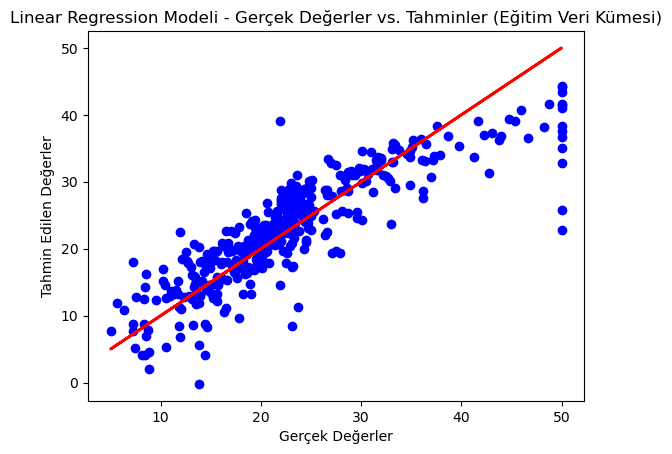

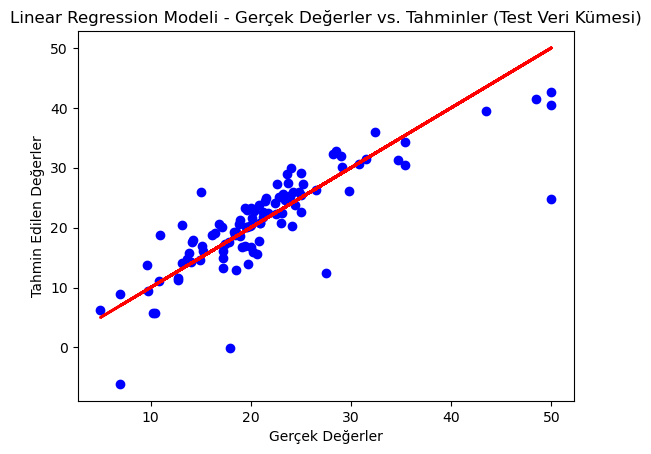

Random Forest Modeli için R2 Değerleri:
Eğitim Veri Kümesi R2 Değeri: 0.9774162412943844
Test Veri Kümesi R2 Değeri: 0.8927188644800701


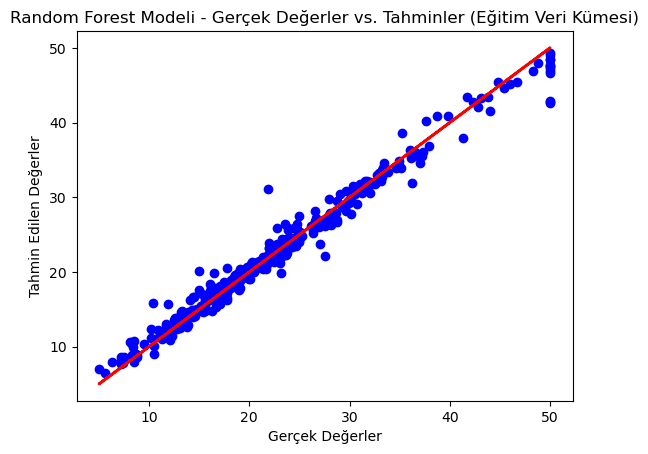

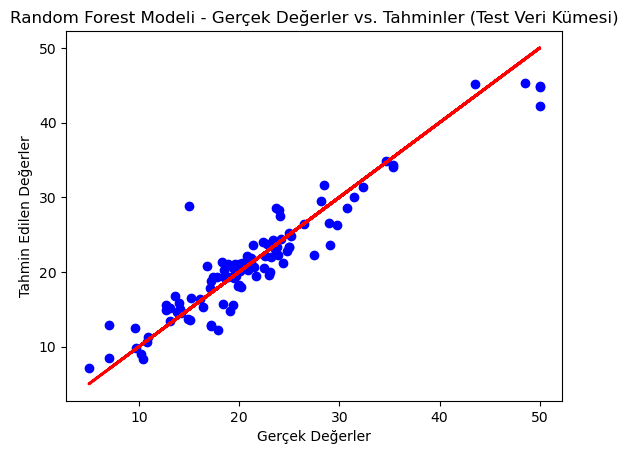

SVR Modeli için R2 Değerleri:
Eğitim Veri Kümesi R2 Değeri: 0.18526517247761265
Test Veri Kümesi R2 Değeri: 0.279507822429951


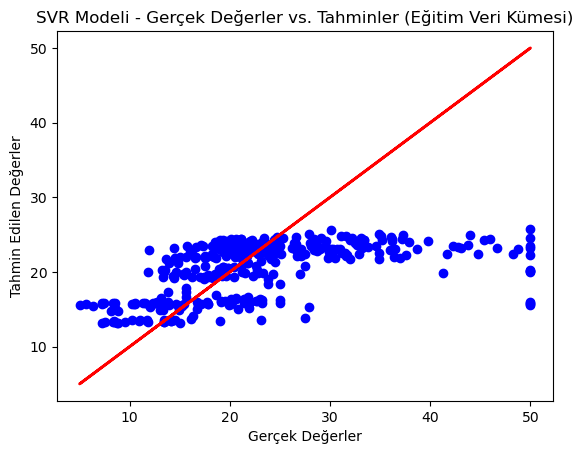

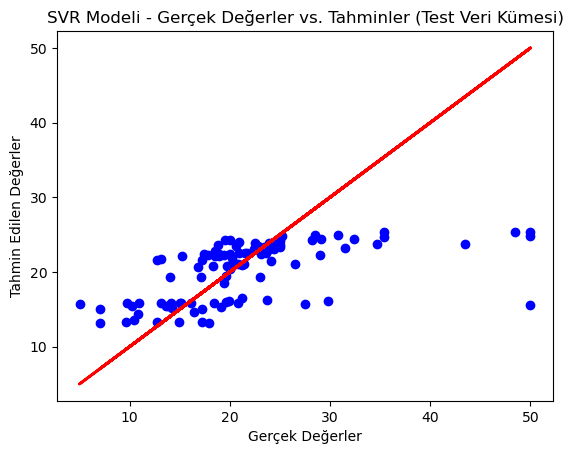

Polynomial Regression Modeli için R2 Değerleri:
Eğitim Veri Kümesi R2 Değeri: 0.9386493316708041
Test Veri Kümesi R2 Değeri: 0.8027154597241586


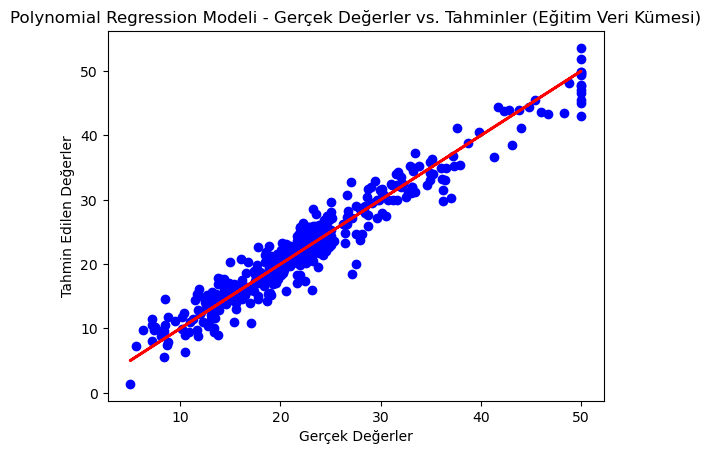

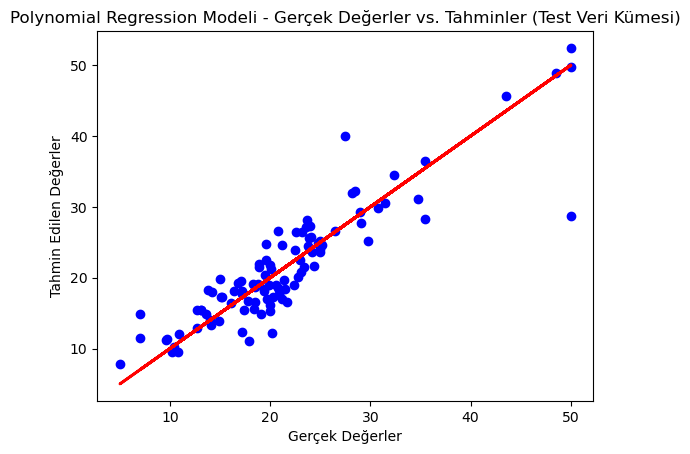

Decision Tree Modeli için R2 Değerleri:
Eğitim Veri Kümesi R2 Değeri: 1.0
Test Veri Kümesi R2 Değeri: 0.8679794194404911


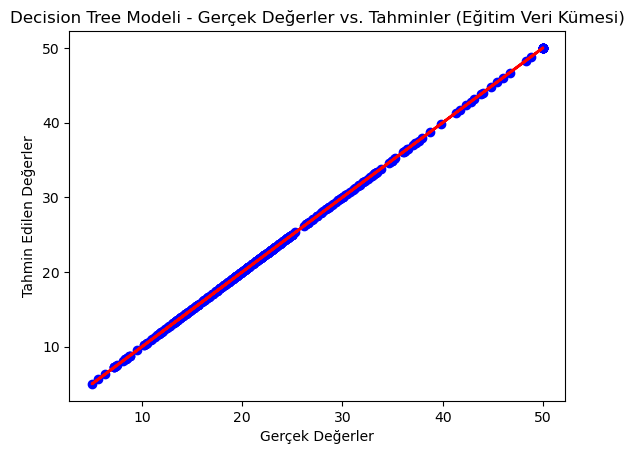

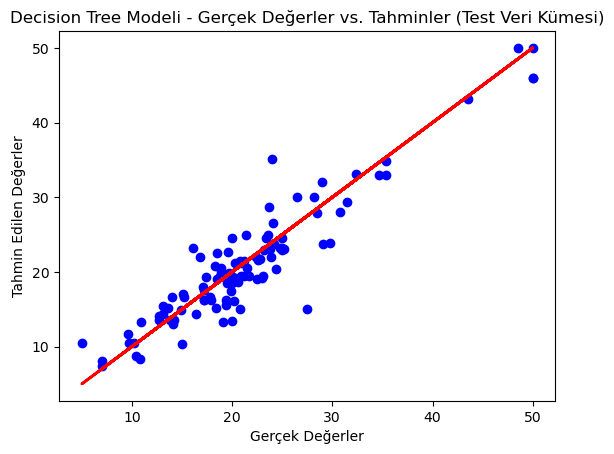

In [13]:
for name, model in models.items():
    # Modeli eğitiyoruz
    model.fit(X_train, Y_train)

    # Tahminler yapalım
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    # Eğitim ve test veri kümeleri için R2 değerlerini hesaplayalım
    r2_train = r2_score(Y_train, predictions_train)
    r2_test = r2_score(Y_test, predictions_test)

    print(f"{name} Modeli için R2 Değerleri:")
    print("Eğitim Veri Kümesi R2 Değeri:", r2_train)
    print("Test Veri Kümesi R2 Değeri:", r2_test)

    # Eğitim veri kümesi için görselleştirme yapalım
    plt.scatter(Y_train, predictions_train, color='blue')
    plt.plot(Y_train, Y_train, color='red', linewidth=2)
    plt.title(f'{name} Modeli - Gerçek Değerler vs. Tahminler (Eğitim Veri Kümesi)')
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Edilen Değerler')
    plt.show()

    # Test veri kümesi için görselleştirme yapalım
    plt.scatter(Y_test, predictions_test, color='blue')
    plt.plot(Y_test, Y_test, color='red', linewidth=2)
    plt.title(f'{name} Modeli - Gerçek Değerler vs. Tahminler (Test Veri Kümesi)')
    plt.xlabel('Gerçek Değerler')
    plt.ylabel('Tahmin Edilen Değerler')
    plt.show()


Burada eğitim ve test verisi üzerinde en yüksek değeri veren modeli seçeceğiz ki bu da random forest oluyor.



Random forest hiperparametresini randomized search ve grid search için deneyelim.

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# Random Forest için hiperparametrelerin olası değer aralıklarını tanımlayalım
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Random Forest Regressor modelini oluşturalım
rf_model = RandomForestRegressor()

# RandomizedSearchCV objesini oluşturalım
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   n_iter=100, cv=3, verbose=2,
                                   random_state=42, n_jobs=-1)

# Randomized Search'i eğitelim
random_search.fit(X_train, Y_train)

# En iyi parametreleri ve en iyi skoru görüntüleyelim
print("En iyi parametreler:", random_search.best_params_)
print("En iyi R2 skoru:", random_search.best_score_)

# En iyi modeli kullanarak tahminler yapalım
best_model = random_search.best_estimator_
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)

# Eğitim ve test veri kümeleri için R2 değerlerini hesaplayalım
r2_train = r2_score(Y_train, predictions_train)
r2_test = r2_score(Y_test, predictions_test)
print("Eğitim Veri Kümesi R2 Değeri (Optimize Edilmiş):", r2_train)
print("Test Veri Kümesi R2 Değeri (Optimize Edilmiş):", r2_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
En iyi parametreler: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': True}
En iyi R2 skoru: 0.8145787361369559
Eğitim Veri Kümesi R2 Değeri (Optimize Edilmiş): 0.9787329859600945
Test Veri Kümesi R2 Değeri (Optimize Edilmiş): 0.8818955430896227


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Random Forest için hiperparametrelerin olası değer aralıklarını tanımlayın
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest Regressor modelini oluşturun
rf_model = RandomForestRegressor()

# GridSearchCV objesini oluşturun
grid_search = GridSearchCV(estimator=rf_model,
                           param_grid=param_grid,
                           cv=3, verbose=2,
                           n_jobs=-1)

# Grid Search'i eğitin
grid_search.fit(X_train, Y_train)

# En iyi parametreleri ve en iyi skoru görüntüleyin
print("En iyi parametreler:", grid_search.best_params_)
print("En iyi R2 skoru:", grid_search.best_score_)

# En iyi modeli kullanarak tahminler yapın
best_model = grid_search.best_estimator_
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)

# Eğitim ve test veri kümeleri için R2 değerlerini hesaplayın
r2_train = r2_score(Y_train, predictions_train)
r2_test = r2_score(Y_test, predictions_test)
print("Eğitim Veri Kümesi R2 Değeri (Optimize Edilmiş):", r2_train)
print("Test Veri Kümesi R2 Değeri (Optimize Edilmiş):", r2_test)

Fitting 3 folds for each of 990 candidates, totalling 2970 fits
En iyi parametreler: {'bootstrap': True, 'max_depth': 70, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
En iyi R2 skoru: 0.8193686847454126
Eğitim Veri Kümesi R2 Değeri (Optimize Edilmiş): 0.958356272998714
Test Veri Kümesi R2 Değeri (Optimize Edilmiş): 0.8754943051634743


#Genel olarak, hiperparametre arama alanı büyükse ve hesaplama kaynakları sınırlıysa Randomized Search tercih edilebilir ve bu veri kaynağında bu nedenlerin yanında daha kısa sürede olması için randomized search tercih edilmeli.


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# En iyi modelin tahminlerini yapalım
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)

# Eğitim ve test veri kümeleri için MSE hesaplayalım
mse_train = mean_squared_error(Y_train, predictions_train)
mse_test = mean_squared_error(Y_test, predictions_test)

# Eğitim ve test veri kümeleri için MAE hesaplayalım
mae_train = mean_absolute_error(Y_train, predictions_train)
mae_test = mean_absolute_error(Y_test, predictions_test)

# Eğitim ve test veri kümeleri için R2 hesaplayalım
r2_train = r2_score(Y_train, predictions_train)
r2_test = r2_score(Y_test, predictions_test)

print("Eğitim Veri Kümesi:")
print("MSE:", mse_train)       #Daha küçük MSE, daha iyi bir model performansını gösterir.
print("MAE:", mae_train)       #MAE, tahminlerin gerçek değerlerden ortalama olarak ne kadar uzak olduğunu ölçer.
print("R^2:", r2_train)        #Değer ne kadar yüksekse, modelin verilere ne kadar iyi uydurulduğu o kadar iyidir.

print("\nTest Veri Kümesi:")
print("MSE:", mse_test)
print("MAE:", mae_test)
print("R^2:", r2_test)

Eğitim Veri Kümesi:
MSE: 3.6177323128921577
MAE: 1.3245418463223013
R^2: 0.958356272998714

Test Veri Kümesi:
MSE: 9.130473627367117
MAE: 2.1176753913370474
R^2: 0.8754943051634743


"""
Eğitim Veri Kümesi:
MSE: 3.730821775962009 # Eğitim veri kümesindeki ortalama kare hatası oldukça düşüktür, bu da modelin eğitim verilerine ne kadar iyi uydurulduğunu gösterir.
MAE: 1.3005692999766432 #Eğitim veri kümesindeki ortalama mutlak hatası da düşüktür, bu da modelin eğitim verilerini ne kadar iyi tahmin ettiğini gösterir.
R^2: 0.9570544998658539 #R-kare değeri oldukça yüksektir, bu da modelin bağımsız değişkenler tarafından bağımlı değişkenlerdeki varyansın %96'sını açıkladığını gösterir. Modelinizin eğitim verilerine iyi uydurulduğunu gösterir.

Test Veri Kümesi:
MSE: 9.170663795562517 #Test veri kümesindeki ortalama kare hatası eğitim veri kümesinden daha yüksektir, bu da modelin test verilerine daha az iyi uyarlandığını gösterebilir.
MAE: 2.123718171776772 #Test veri kümesindeki ortalama mutlak hatası da eğitim veri kümesinden daha yüksektir, bu da modelin test verilerini daha kötü tahmin ettiğini gösterebilir.
R^2: 0.874946260777062 #Test veri kümesindeki R-kare değeri eğitim veri kümesinden daha düşüktür, bu da modelin test verilerine daha az iyi uydurulduğunu gösterir.
"""

#Genel olarak, modelin eğitim verilerine oldukça iyi uydurulduğu görünmektedir ancak test verilerine uygulanması, modelin genelleme yeteneğinin sınırlı olabileceğini gösterebilir.


"""

Bu kod, ev fiyatlarını tahmin etmek için bir dizi makine öğrenimi modelini uygular. İşte kodun genel akışı:

Gerekli kütüphaneler import edilir: pandas, numpy, OneHotEncoder ve train_test_split.

Veri seti "housing.csv" dosyasından yüklenir ve pandas DataFrame'e aktarılır.

Veri seti kontrol edilir ve ilk birkaç satır görüntülenir. Ayrıca veri setinin boyutu ve sayısal özellikleri incelenir.

Eksik veri kontrolü yapılır. Bu veri setinde eksik veri olmadığı belirtilir.

Kategorik değişkenler işlenir. "CHAS" sütunu kategorik olarak işlenir ve One-Hot Encoding uygulanır.

Bağımsız ve bağımlı değişkenler ayrılır.

Eğitim ve test kümeleri oluşturulur (%80 eğitim, %20 test).

Çeşitli makine öğrenimi modelleri tanımlanır: Lineer Regresyon, Rastgele Orman Regresyonu, Destek Vektör Regresyonu, Polinom Regresyonu ve Karar Ağacı Regresyonu.

Her bir model için eğitim yapılır, tahminler yapılır ve R2 değerleri hesaplanır.

Her bir model için eğitim ve test veri kümeleri için gerçek değerlerle tahmin edilen değerler arasındaki ilişki görselleştirilir.

RandomizedSearchCV kullanılarak en iyi hiperparametrelerin bulunması ve en iyi modelin seçilmesi sağlanır.

En iyi model ile eğitim ve test veri kümeleri için R2 değerleri yeniden hesaplanır.

En iyi modelin performansı, MSE, MAE ve R2 skoru ile değerlendirilir.

Bu kod, bir dizi modelin performansını değerlendirmek ve en iyi modeli seçmek için kapsamlı bir yaklaşım sunar.


"""